In [ ]:
!nvidia-smi

Wed Jun 11 14:24:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA A100-SXM4-40GB


In [ ]:
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

12.4
True


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install dependencies

In [ ]:
pip install ultralytics roboflow

## Imports

In [ ]:
from roboflow import Roboflow
from IPython.display import Image

## Pull dataset

In [ ]:
import os
os.makedirs(f"{HOME}/datasets", exist_ok=True)
os.chdir(f"{HOME}/datasets")

rf = Roboflow(api_key="iXAvxUX4T4JeLlseuXiU")

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(14)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



In [ ]:
data_yaml_path = os.path.join(dataset.location, "data.yaml")

with open(data_yaml_path, "r") as file:
    lines = file.readlines()

with open(data_yaml_path, "w") as file:
    for line in lines:
        if line.startswith("train:"):
            file.write("train: ../train/images\n")
        elif line.startswith("val:"):
            file.write("val: ../valid/images\n")
        else:
            file.write(line)

## Custom training

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA A100-SXM4-40GB


In [ ]:
from ultralytics import YOLO
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

model = YOLO('yolo11x.pt')
print(f'{dataset.location}/data.yaml')
# Training
model.train(
    data=f'{dataset.location}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    plots=True,
    device=0
)


/content/datasets/football-players-detection-14/data.yaml
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/football-players-detection-14/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, o

train: Scanning /content/datasets/football-players-detection-14/train/labels.cache... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 660.5±474.6 MB/s, size: 61.9 KB)


val: Scanning /content/datasets/football-players-detection-14/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      33.2G      1.939      3.735     0.9786        343        640: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         49       1174      0.427      0.169      0.162     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      33.5G       1.45      1.393     0.8966        259        640: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         49       1174      0.174      0.193      0.181      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      33.7G      1.254     0.9266     0.8648        288        640: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         49       1174   0.000136    0.00206   6.87e-05   4.37e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      33.8G      1.248     0.8205     0.8455        270        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         49       1174          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      33.7G      1.332     0.7878      0.847        345        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         49       1174          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      33.6G      1.345     0.8129     0.8618        324        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         49       1174          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      33.7G      1.307     0.8091     0.8543        331        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         49       1174    0.00114    0.00316   0.000567   0.000245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      33.7G      1.354     0.8048     0.8632        388        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         49       1174     0.0223      0.176     0.0124    0.00659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      33.6G      1.318     0.7678     0.8481        314        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         49       1174          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      33.7G      1.244     0.6979     0.8492        279        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         49       1174     0.0358      0.275     0.0265     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      33.6G      1.214     0.7089     0.8608        268        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         49       1174      0.236      0.339      0.147     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      33.8G      1.281     0.7312     0.8607        256        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         49       1174      0.432       0.47       0.31      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      33.7G      1.367     0.7125     0.8651        276        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         49       1174       0.51      0.603      0.465      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      33.7G      1.514     0.7819     0.8801        287        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         49       1174      0.571      0.509      0.547       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      33.7G      1.319     0.7221     0.8646        327        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         49       1174      0.453        0.4      0.348      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      33.6G      1.232     0.6502     0.8505        286        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         49       1174      0.689      0.517       0.59      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      33.7G      1.168     0.6402     0.8462        320        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         49       1174      0.756      0.618       0.69      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      33.7G      1.161     0.6123     0.8389        525        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         49       1174      0.722       0.52      0.562      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      33.7G      1.128     0.6042     0.8364        363        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         49       1174      0.624      0.513      0.536      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      33.8G      1.115     0.5915     0.8272        341        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         49       1174      0.638      0.696      0.682      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      33.7G      1.112      0.578     0.8281        328        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         49       1174      0.759      0.713      0.726      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      33.6G      1.072     0.5551      0.828        384        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         49       1174      0.738      0.599      0.683       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      33.8G      1.095      0.576      0.826        287        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.743      0.706      0.694      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      33.7G      1.055     0.5483     0.8224        244        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         49       1174      0.718      0.679      0.699      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      33.7G      1.118     0.5716     0.8319        359        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         49       1174      0.845      0.709      0.764       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      33.8G      1.012     0.5269     0.8227        305        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         49       1174      0.874      0.738      0.789      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      33.8G      1.016     0.5237     0.8237        301        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         49       1174      0.747        0.7      0.747      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      33.6G     0.9928     0.5116     0.8179        227        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         49       1174      0.792      0.754      0.772      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      33.7G     0.9874     0.5088     0.8207        288        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.869      0.682      0.772      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      33.7G     0.9733     0.4932      0.817        337        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         49       1174      0.799      0.653      0.722      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      33.7G      1.003     0.5101      0.819        291        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         49       1174      0.775      0.638      0.713      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      33.8G      0.987     0.5036     0.8184        444        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         49       1174      0.817      0.702      0.758      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      33.8G     0.9795     0.5021     0.8145        328        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         49       1174       0.82      0.694       0.75      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      33.8G     0.9506     0.4855     0.8189        279        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         49       1174      0.891      0.714      0.799      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      33.8G      1.004      0.494     0.8136        344        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         49       1174      0.879      0.711      0.791      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      33.7G     0.9953     0.4993     0.8188        374        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.857      0.756      0.788      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      33.6G     0.9779     0.4828     0.8186        354        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         49       1174      0.858      0.696      0.776      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      33.6G      0.973     0.4854     0.8099        435        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         49       1174      0.828      0.759      0.766      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      33.8G     0.9238     0.4696     0.8099        407        640: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         49       1174      0.831      0.725      0.777      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      33.8G     0.9437     0.4703     0.8084        366        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         49       1174      0.834      0.769       0.79      0.519


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      33.9G     0.8872     0.4484     0.8098        234        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         49       1174       0.82      0.756      0.773      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      33.9G     0.8826     0.4453     0.8189        236        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         49       1174      0.842       0.76      0.793      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      33.9G      0.851     0.4241     0.8127        233        640: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         49       1174      0.793      0.722      0.756      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      33.9G     0.8627     0.4296      0.811        220        640: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         49       1174       0.79      0.739      0.777      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      33.9G     0.8543     0.4236     0.8097        239        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.897      0.741      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      33.9G     0.8397     0.4151     0.8071        231        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.928      0.726      0.814      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      33.9G     0.8443     0.4201     0.8082        232        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         49       1174      0.922       0.75      0.823      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      33.9G      0.833     0.4118     0.8018        233        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         49       1174      0.882      0.772       0.82      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      33.9G     0.8159     0.4037     0.8029        233        640: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         49       1174      0.895      0.769      0.816      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      33.9G     0.8034     0.3972     0.8068        231        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         49       1174      0.937      0.751      0.815      0.539



50 epochs completed in 0.094 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 114.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]


                   all         49       1174      0.922       0.75      0.823      0.553
                  ball         45         45      0.925      0.276      0.444      0.171
            goalkeeper         38         39      0.852      0.897      0.911      0.676
                player         49        973      0.966      0.929      0.988      0.751
               referee         49        117      0.945      0.897      0.949      0.613
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e88794d1010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

/content


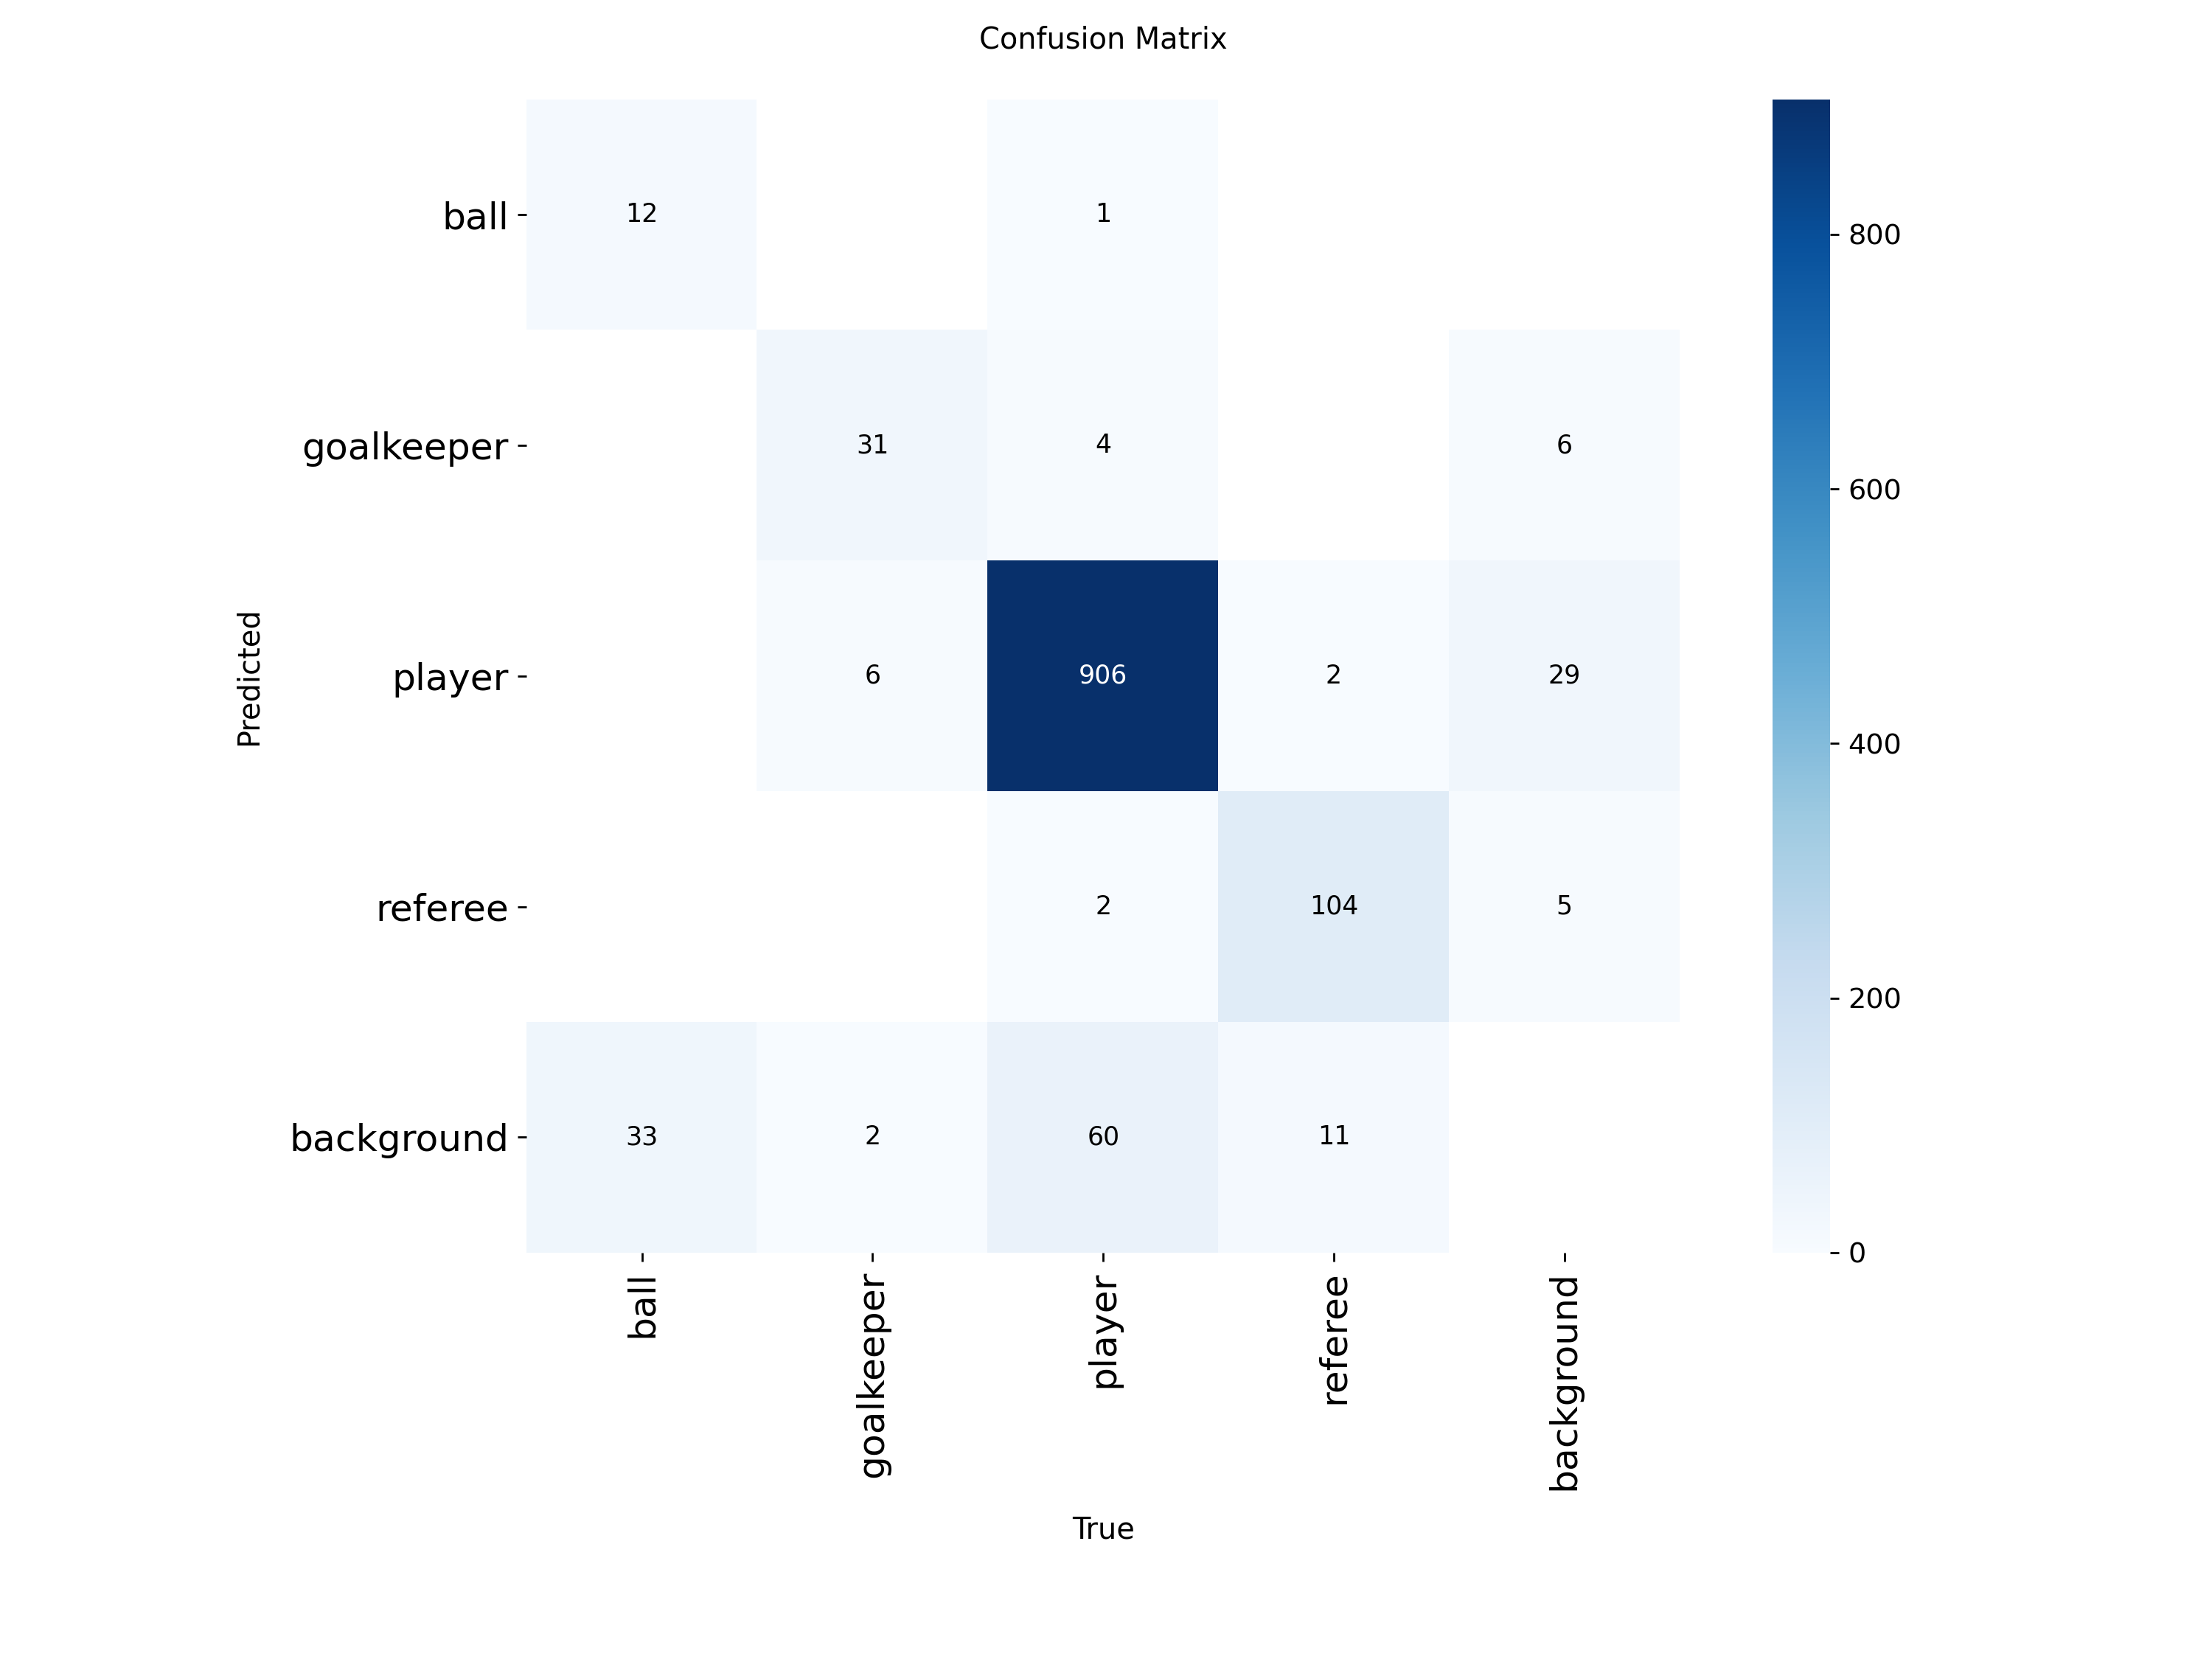

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train3/confusion_matrix.png', width=600)

/content


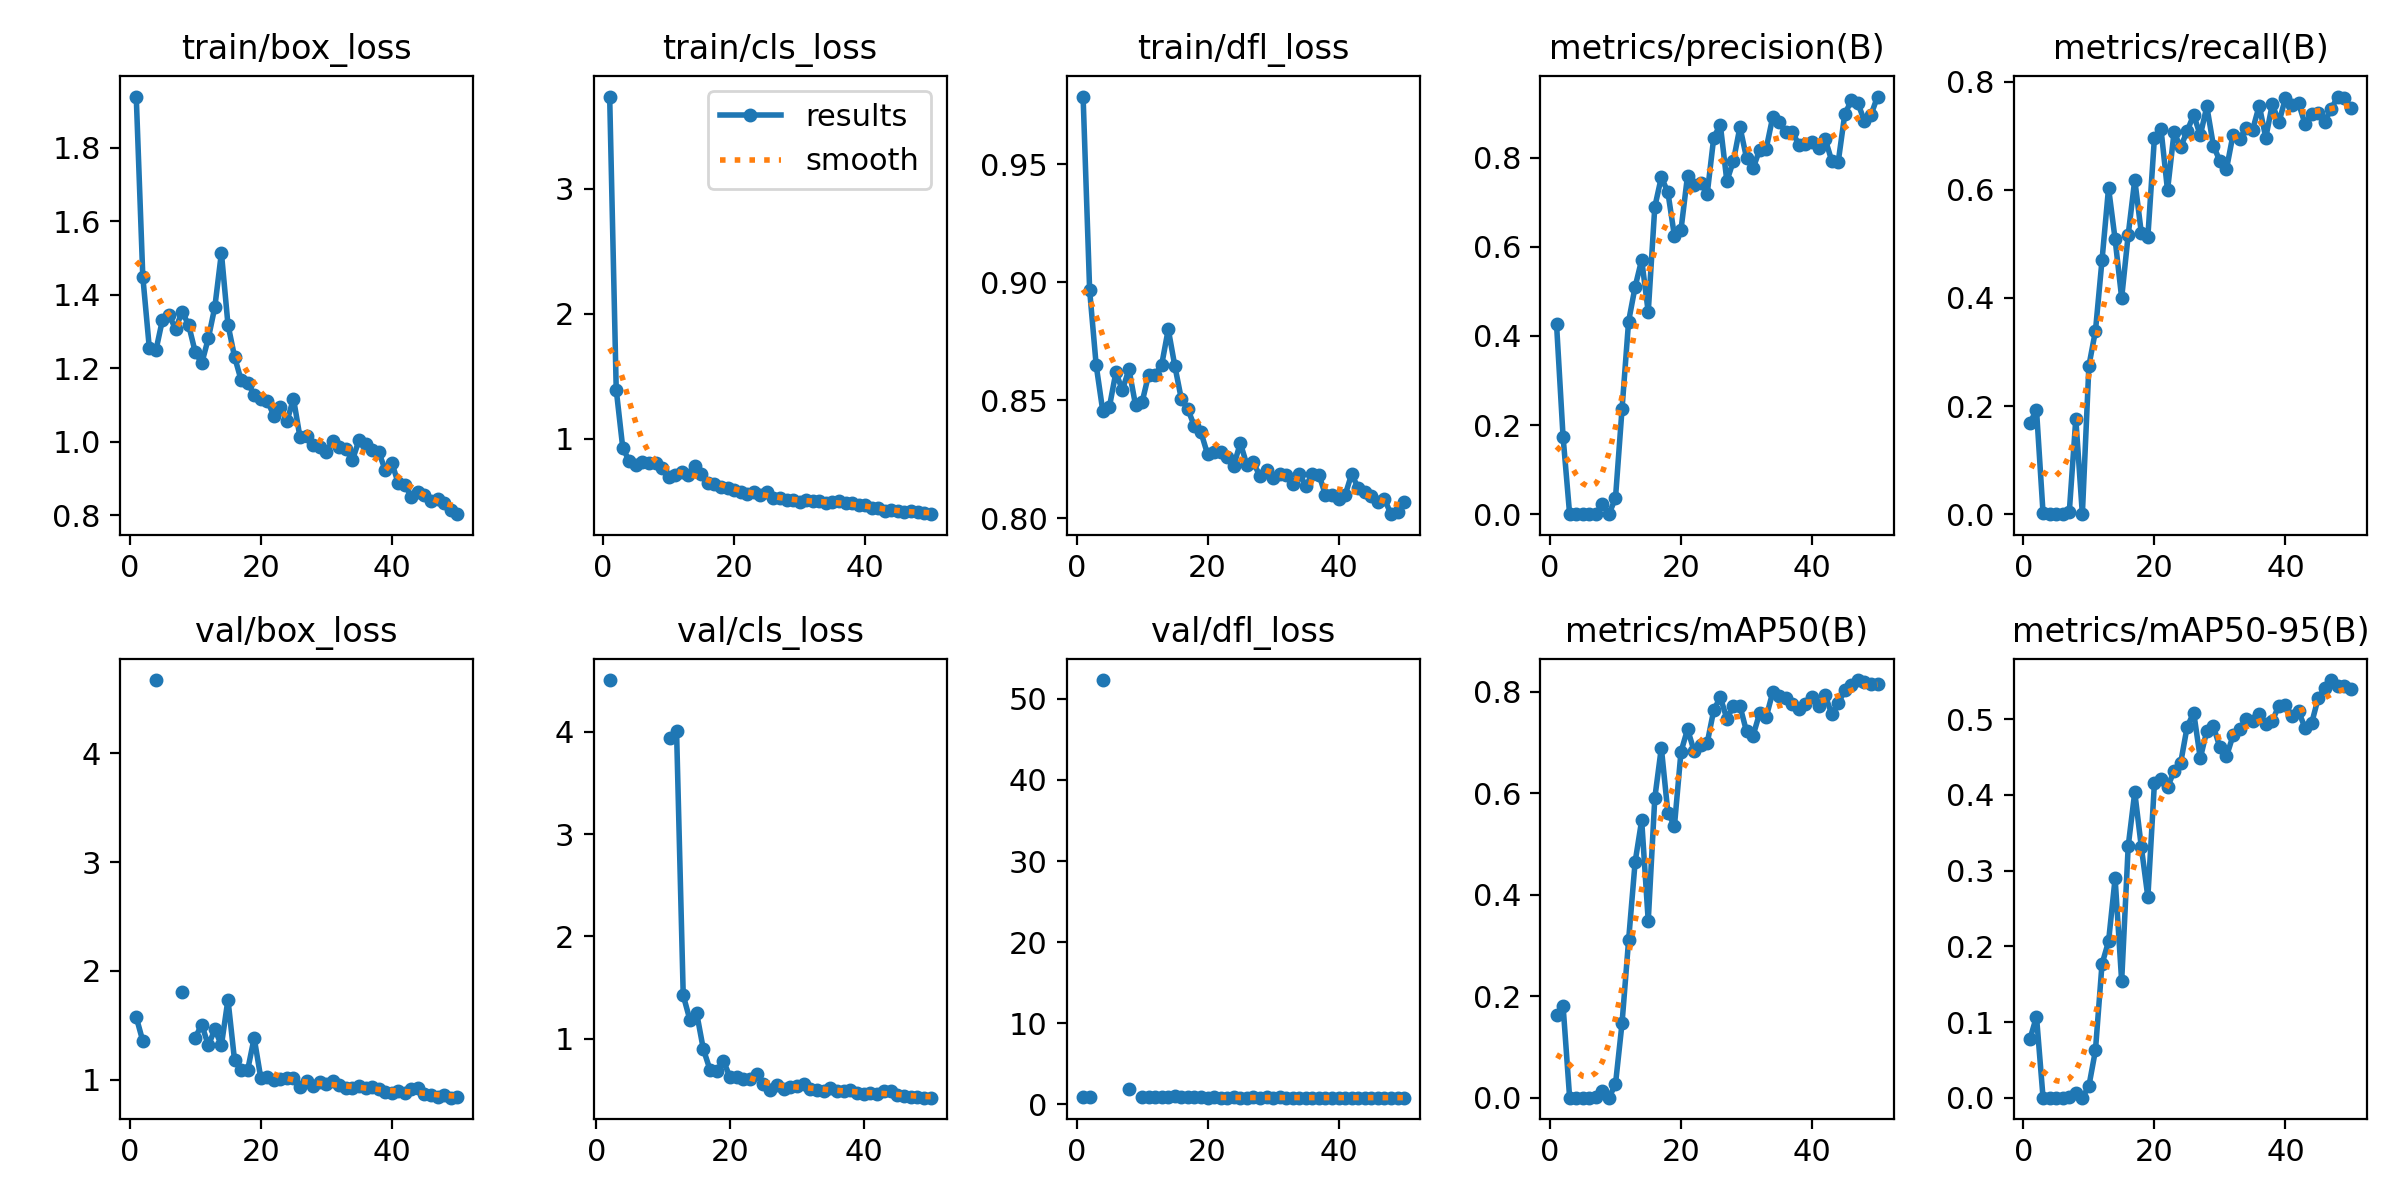

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train3/results.png', width=600)

/content


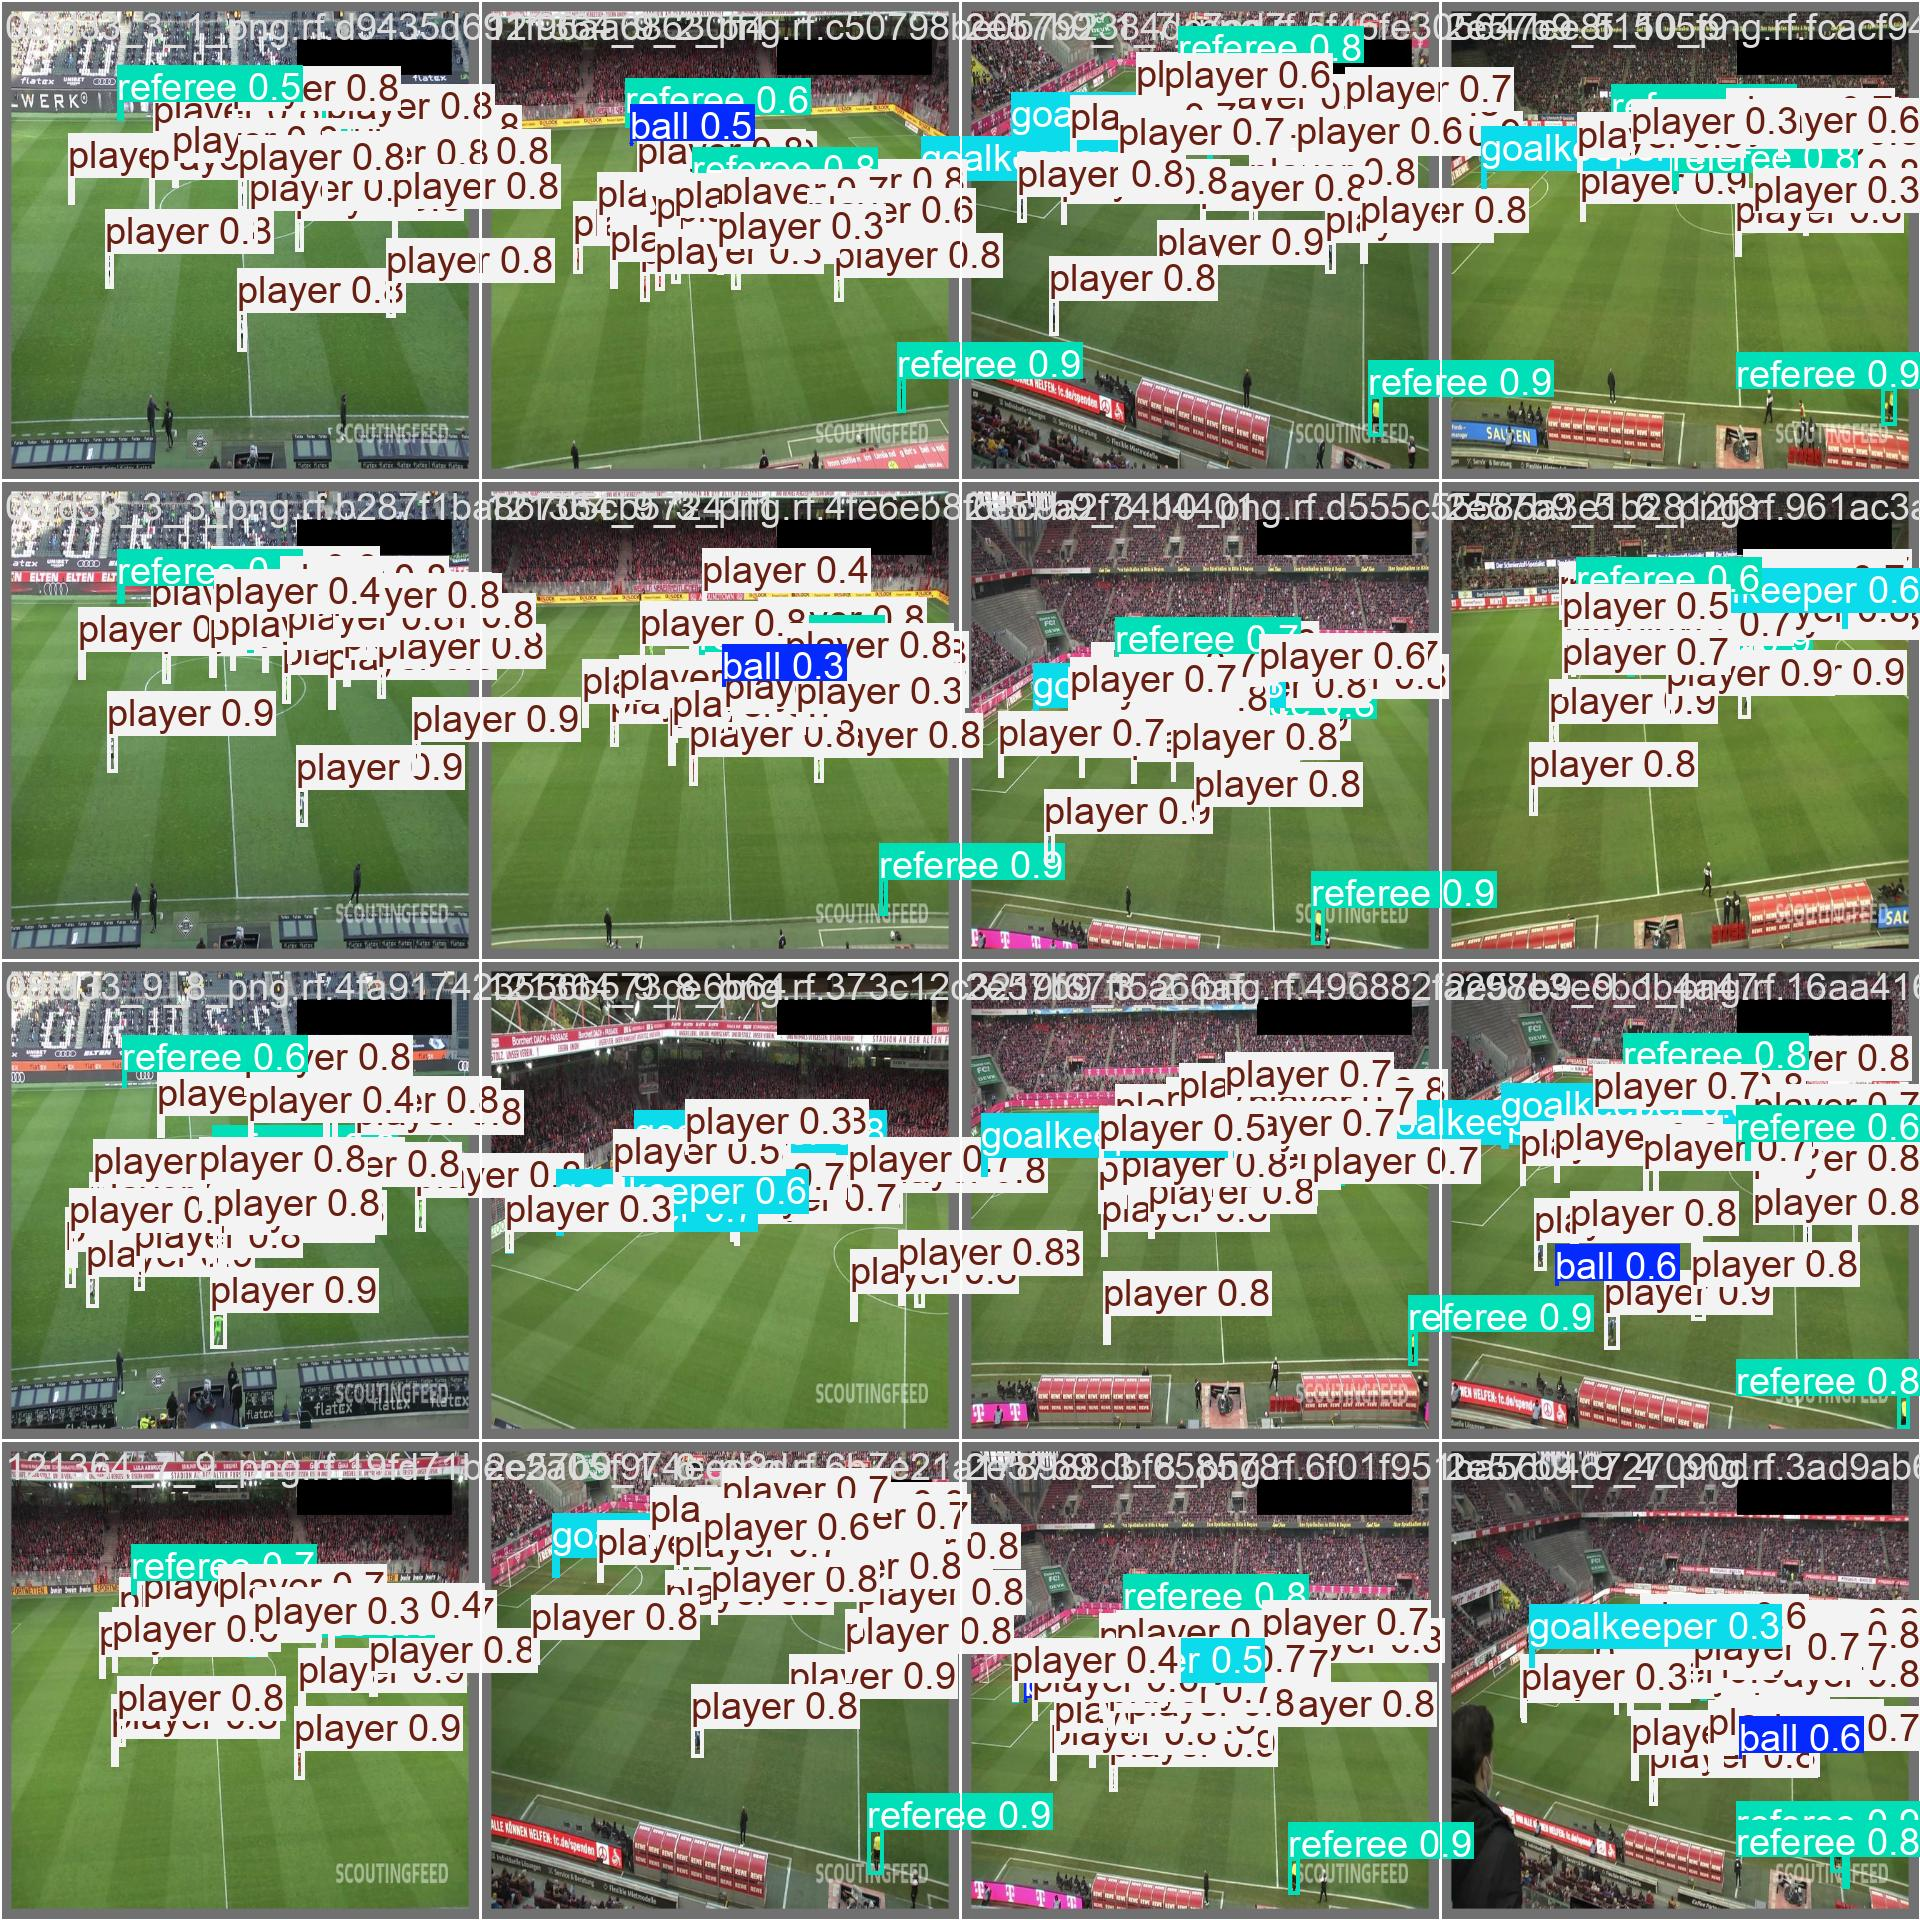

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate custom model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml imgsz=640

/content
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2177.0±418.7 MB/s, size: 54.5 KB)
val: Scanning /content/datasets/football-players-detection-14/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.16it/s]
                   all         49       1174      0.925       0.75      0.825      0.552
                  ball         45         45      0.925      0.276      0.446      0.174
            goalkeeper         38         39      0.866      0.897      0.912      0.669
                player         49        973      0.965      0.929      0.988      0.761
               referee         49        117      0.945      0.897      0.953      0.606
Speed: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/datasets/runs/detect/train3/weights/best.pt /content/drive/MyDrive/p_detector_best.pt

In [ ]:
!cp /content/datasets/runs/detect/train3/weights/last.pt /content/drive/MyDrive/p_detector_last.pt